In [30]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [31]:
model = DiscreteBayesianNetwork([
    ('Spam', 'Offer'),
    ('Spam', 'Link'),
    ('Link', 'Long Mail'),
    ('Spam', 'Long Mail')
    ])

cpd_spam = TabularCPD(
    variable='Spam',
    variable_card=2,
    values=[[0.4], [0.6]]
    )

cpd_offer = TabularCPD(
    variable='Offer',
    variable_card=2,
    values=[
            [0.9, 0.3],
            [0.1, 0.7] 
        ],
    evidence=['Spam'],
    evidence_card=[2]
    )

cpd_link = TabularCPD(
    variable='Link',
    variable_card=2,
    values=[
            [0.7, 0.2],
            [0.3, 0.8]
        ],
    evidence=['Spam'],
    evidence_card=[2]
    )

cpd_long_mail = TabularCPD(
    variable='Long Mail',
    variable_card=2,
    values=[
        [0.8, 0.4, 0.5, 0.1],
        [0.2, 0.6, 0.5, 0.9]
    ],
    evidence=['Spam', 'Link'],
    evidence_card=[2, 2]
    )


model.add_cpds(cpd_spam, cpd_offer, cpd_link, cpd_long_mail)

model.check_model()

True

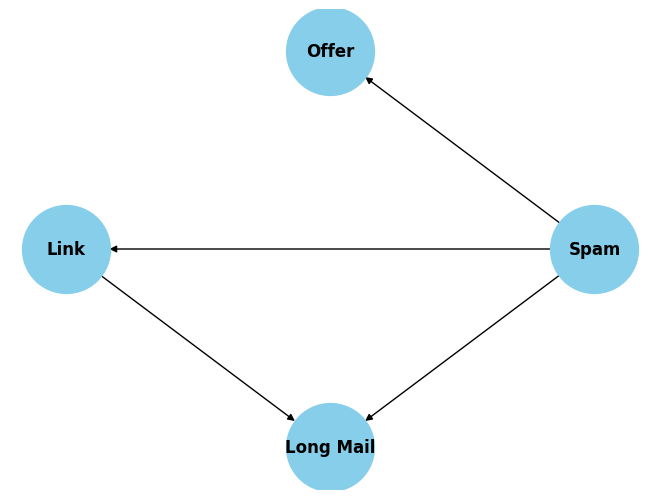

In [32]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()

In [33]:
model.local_independencies(['Spam', 'Offer', 'Link', 'Long Mail'])

(Offer ⟂ Long Mail, Link | Spam)
(Link ⟂ Offer | Spam)
(Long Mail ⟂ Offer | Spam, Link)

In [34]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
for x, y, z in [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]:
    posterior_p = infer.query(["Spam"], evidence={"Offer": x, "Link": y, "Long Mail": z})
    print(f"Offer={x}, Link={y}, Long Mail={z} => {posterior_p}")
posterior_p = infer.query(["Spam"], evidence={"Offer": 1})
print(posterior_p)

Offer=0, Link=0, Long Mail=0 => +---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.9180 |
+---------+-------------+
| Spam(1) |      0.0820 |
+---------+-------------+
Offer=0, Link=0, Long Mail=1 => +---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.7368 |
+---------+-------------+
| Spam(1) |      0.2632 |
+---------+-------------+
Offer=0, Link=1, Long Mail=0 => +---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.7500 |
+---------+-------------+
| Spam(1) |      0.2500 |
+---------+-------------+
Offer=0, Link=1, Long Mail=1 => +---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.3333 |
+---------+-------------+
| Spam(1) |      0.6667 |
+---------+-------------+
Offer=1, Link=0, Long Mail=0 => +---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.3478 |
+-------

In [35]:
posterior_p = infer.query(["Spam"], evidence={"Offer": 0})
print(posterior_p)


+---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.6667 |
+---------+-------------+
| Spam(1) |      0.3333 |
+---------+-------------+


In [24]:
posterior_p = infer.query(["Spam"], evidence={"Link": 1})
print(posterior_p)

+---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.2000 |
+---------+-------------+
| Spam(1) |      0.8000 |
+---------+-------------+


In [25]:
posterior_p = infer.query(["Spam"], evidence={"Link": 0})
print(posterior_p)

+---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.7000 |
+---------+-------------+
| Spam(1) |      0.3000 |
+---------+-------------+


In [26]:
posterior_p = infer.query(["Spam"], evidence={"Long Mail": 1})
print(posterior_p)

+---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.2065 |
+---------+-------------+
| Spam(1) |      0.7935 |
+---------+-------------+


In [27]:
posterior_p = infer.query(["Spam"], evidence={"Long Mail": 0})
print(posterior_p)

+---------+-------------+
| Spam    |   phi(Spam) |
+=========+=============+
| Spam(0) |      0.7158 |
+---------+-------------+
| Spam(1) |      0.2842 |
+---------+-------------+
